In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences

In [2]:
os.listdir('/content/drive/MyDrive/Flickr8kdataset/Images')

['2805873509_4f68afc4b4.jpg',
 '2780031669_a0345cfc26.jpg',
 '2773400732_5b65a25857.jpg',
 '2778290592_1910bb0431.jpg',
 '2800990525_a1f8427272.jpg',
 '2786245676_0a69543832.jpg',
 '2789648482_1df61f224a.jpg',
 '280932151_ae14a67be5.jpg',
 '2768972186_92787cd523.jpg',
 '2804374083_311f98f5f2.jpg',
 '2763044275_aa498eb88b.jpg',
 '2786299623_a3c48bd318.jpg',
 '278002800_3817135105.jpg',
 '2792195540_af5fb95caa.jpg',
 '278388986_78ba84eb8f.jpg',
 '2795352290_9209b214f3.jpg',
 '2774554310_007e980a90.jpg',
 '2797149878_bb8e27ecf9.jpg',
 '2800934095_b84a5009dd.jpg',
 '2797185895_4d9e1e9508.jpg',
 '2760371526_63f3d01760.jpg',
 '278105206_df987b0ca0.jpg',
 '2806632713_edd6f6c893.jpg',
 '2781296531_f6f0f6c0f5.jpg',
 '2771424045_1fdf9617eb.jpg',
 '2776029171_5abdd5a22f.jpg',
 '2765029348_667111fc30.jpg',
 '2806710650_e201acd913.jpg',
 '2775744946_1ab5d500a2.jpg',
 '2810333931_47fd8dd340.jpg',
 '278002947_3fd22a2cb6.jpg',
 '2802337003_56e555cd30.jpg',
 '2769731772_18c44c18e2.jpg',
 '2788652511_4f

In [3]:
metadata = pd.read_csv('/content/drive/MyDrive/Flickr8kdataset/result.csv',engine='python')
metadata = metadata.dropna()
is_NaN = metadata.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = metadata[row_has_NaN]
print(rows_with_NaN)
metadata.head()

Empty DataFrame
Columns: [image, caption]
Index: []


,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
len(metadata['image'].unique())

8091

In [6]:
def load_image(name):
    img = image.load_img(name,target_size=(32,32,3))
    img = image.img_to_array(img)
    #img = img/255
    #plt.imshow(img)
    img = np.reshape(img,(32*32*3))
    return img

In [7]:
image_arr = []
sentence_arr = []
for ind in range(5000):
    if ind % 5 != 0:
        continue
    image_location = (metadata.iloc[ind,:][0])
    sentence = (metadata.iloc[ind,:][1])
    
    
    image_arr.append(load_image('/content/drive/MyDrive/Flickr8kdataset/Images/'+str(image_location)) )
    sentence_arr.append('<SOS>'+sentence+'<EOS>')
    
        
Images =  np.array(image_arr)

In [8]:
def tokenize(x):
    """
    Tokenize x
    :param x: List of sentences/strings to be tokenized
    :return: Tuple of (tokenized x data, tokenizer used to tokenize x)
    """
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts(x)
    t=tokenizer.texts_to_sequences(x)
    # TODO: Implement
    return t, tokenizer

# Tokenize Example output
text_sentences = [
    'The quick brown fox jumps over the lazy dog .',
    'By Jove , my quick study of lexicography won a prize .',
    'This is a short sentence .']
text_tokenized, text_tokenizer = tokenize(text_sentences)
print(text_tokenizer.word_index)
print()
for sample_i, (sent, token_sent) in enumerate(zip(text_sentences, text_tokenized)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(sent))
    print('  Output: {}'.format(token_sent))

{'the': 1, 'quick': 2, 'a': 3, 'brown': 4, 'fox': 5, 'jumps': 6, 'over': 7, 'lazy': 8, 'dog': 9, 'by': 10, 'jove': 11, 'my': 12, 'study': 13, 'of': 14, 'lexicography': 15, 'won': 16, 'prize': 17, 'this': 18, 'is': 19, 'short': 20, 'sentence': 21}

Sequence 1 in x
  Input:  The quick brown fox jumps over the lazy dog .
  Output: [1, 2, 4, 5, 6, 7, 1, 8, 9]
Sequence 2 in x
  Input:  By Jove , my quick study of lexicography won a prize .
  Output: [10, 11, 12, 2, 13, 14, 15, 16, 3, 17]
Sequence 3 in x
  Input:  This is a short sentence .
  Output: [18, 19, 3, 20, 21]


In [9]:
def pad(x, length=None):
    """
    Pad x
    :param x: List of sequences.
    :param length: Length to pad the sequence to.  If None, use length of longest sequence in x.
    :return: Padded numpy array of sequences
    """
    # TODO: Implement
    padding=pad_sequences(x,padding='post',maxlen=length)
    return padding

# Pad Tokenized output
test_pad = pad(text_tokenized)
for sample_i, (token_sent, pad_sent) in enumerate(zip(text_tokenized, test_pad)):
    print('Sequence {} in x'.format(sample_i + 1))
    print('  Input:  {}'.format(np.array(token_sent)))
    print('  Output: {}'.format(pad_sent))

Sequence 1 in x
  Input:  [1 2 4 5 6 7 1 8 9]
  Output: [1 2 4 5 6 7 1 8 9 0]
Sequence 2 in x
  Input:  [10 11 12  2 13 14 15 16  3 17]
  Output: [10 11 12  2 13 14 15 16  3 17]
Sequence 3 in x
  Input:  [18 19  3 20 21]
  Output: [18 19  3 20 21  0  0  0  0  0]


In [10]:
def preprocess(sentences):
    text_tokenized, text_tokenizer = tokenize(sentences)
    text_pad = pad(text_tokenized)
    return text_pad, text_tokenizer

Sentence , token_Sentence = preprocess(sentence_arr)

In [11]:
print("Sentence vocabulary size:", len(token_Sentence.word_index))
print("Sentence Longest sentence size:", len(Sentence[0]))

Sentence vocabulary size: 1503
Sentence Longest sentence size: 35


In [12]:
Images.shape , Sentence.shape

((1000, 3072), (1000, 35))

In [13]:
Sentence

array([[  2,   1,  30, ...,   0,   0,   0],
       [  2,   1,  14, ...,   0,   0,   0],
       [  2,   1,  37, ...,   0,   0,   0],
       ...,
       [  2,   1,  15, ...,   0,   0,   0],
       [  2,   1, 117, ...,   0,   0,   0],
       [  2,   1,  17, ...,   0,   0,   0]], dtype=int32)

In [14]:
def create_batch(src, tar , batchsize , i):
    src, tar =  np.transpose(src[(i-1)*batchsize : (i-1)*batchsize + batchsize]) , np.transpose(tar[(i-1)*batchsize : (i-1)*batchsize + batchsize])
    return torch.tensor(src).long(),torch.tensor(tar).long()

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
class Transformer(nn.Module):
    def __init__(
        self,
        embedding_size,
        src_vocab_size,
        trg_vocab_size,
        src_pad_idx,
        num_heads,
        num_encoder_layers,
        num_decoder_layers,
        forward_expansion,
        dropout,
        max_len_s,
        max_len_t,
        device,
    ):
        super(Transformer, self).__init__()
        self.src_word_embedding = nn.Embedding(src_vocab_size, embedding_size)
        self.src_position_embedding = nn.Embedding(max_len_s, embedding_size)
        self.trg_word_embedding = nn.Embedding(trg_vocab_size, embedding_size)
        self.trg_position_embedding = nn.Embedding(max_len_t, embedding_size)

        self.device = device
        self.transformer = nn.Transformer(
            embedding_size,
            num_heads,
            num_encoder_layers,
            num_decoder_layers,
            forward_expansion,
            dropout,
        )
        self.fc_out = nn.Linear(embedding_size, trg_vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.src_pad_idx = src_pad_idx

    def make_src_mask(self, src):
        src_mask = src.transpose(0, 1) == self.src_pad_idx

        # (N, src_len)
        return src_mask.to(self.device)

    def forward(self, src, trg):
        src_seq_length, N = src.shape
        trg_seq_length, N = trg.shape
        src_positions = (
            torch.arange(0, src_seq_length)
            .unsqueeze(1)
            .expand(src_seq_length, N)
            .to(self.device)
        )

        trg_positions = (
            torch.arange(0, trg_seq_length)
            .unsqueeze(1)
            .expand(trg_seq_length, N)
            .to(self.device)
        )

        embed_src = self.dropout(
            (self.src_word_embedding(src) + self.src_position_embedding(src_positions))
        )
        embed_trg = self.dropout(
            (self.trg_word_embedding(trg) + self.trg_position_embedding(trg_positions))
        )

        src_padding_mask = self.make_src_mask(src)
        trg_mask = self.transformer.generate_square_subsequent_mask(trg_seq_length).to(self.device)
        out = self.transformer(
            embed_src,
            embed_trg,
            src_key_padding_mask=src_padding_mask,
            tgt_mask=trg_mask,
        )
        out = self.fc_out(out)
        return out

In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [17]:
# Model hyperparameters
src_vocab_size = 256
trg_vocab_size = len(token_Sentence.word_index)
embedding_size = 512
num_heads = 8
num_encoder_layers = 3
num_decoder_layers = 3
dropout = 0.10
max_len_s = Images.shape[1]
max_len_t = len(Sentence[0])
forward_expansion = 4
src_pad_idx = 0

In [18]:
# Training hyperparameters
num_epochs = 10000
learning_rate = 3e-4
batch_size = 1

In [19]:
model = Transformer(
    embedding_size,
    src_vocab_size,
    trg_vocab_size,
    src_pad_idx,
    num_heads,
    num_encoder_layers,
    num_decoder_layers,
    forward_expansion,
    dropout,
    max_len_s,
    max_len_t,
    device,
).to(device)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, factor=0.1, patience=10, verbose=True
)

pad_idx = 0
criterion = nn.CrossEntropyLoss(ignore_index=pad_idx).cuda()

In [22]:
import time
def train():
    model.train() # Turn on the train mode
    total_loss = 0
    start_time = time.time()
    for i in range(1, 999):
        src,tar = create_batch(Images,Sentence, batch_size , i)
        src = src.to(device)
        tar = tar.to(device)
        optimizer.zero_grad()
        output = model(src,tar)
        loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)
        optimizer.step()
        cur_loss = loss.item()
        total_loss += cur_loss
        log_interval = 100
        if i % log_interval == 0 and i > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | '
                  's/batch {:5.2f} | '
                  'loss {:5.2f} | ppl {:8.2f}'.format(
                    epoch, i, (src.shape[1]) // batch_size, 
                    elapsed  / log_interval,
                    cur_loss, math.exp(cur_loss)))
            start_time = time.time()
    return total_loss

In [23]:
import math
for epoch in range(1, 3):
    epoch_start_time = time.time()
    loss = train()
    print('-' * 89)
    print('| end of epoch {:3d} | time: {:5.2f}s | Training loss {:5.2f} | '
          .format(epoch, (time.time() - epoch_start_time),
                                     loss))

-----------------------------------------------------------------------------------------
| end of epoch   1 | time:  8.19s | Training loss  1.60 | 
-----------------------------------------------------------------------------------------
| end of epoch   2 | time:  8.15s | Training loss  1.39 | 


In [24]:
def display_image(name):
    img = image.load_img(name,target_size=(512,512,3))
    img = image.img_to_array(img)
    img = img/255
    plt.imshow(img)

In [25]:
def evaluate(index):
    image_location, sent = (metadata.iloc[index,:][0]),(metadata.iloc[index,:][1])
    image_arr = []
    img = load_image('/content/drive/MyDrive/Flickr8kdataset/Images/'+str(image_location))
    image_arr.append(img)
    img_arr = np.array(image_arr)
    sentence = []
    sentence.append(sent)
    sentence[0] = '<SOS> '+sentence[0]+'<EOS>'
    sentence = pad(token_Sentence.texts_to_sequences(sentence) , length = max_len_t)
    src , tar = create_batch(img_arr,sentence, 1,1)
    src = src.to(device)
    tar = tar.to(device)
    model.eval()
    output =  model(src,tar)
    loss = criterion(output.view(-1, output.shape[2]), tar.reshape(-1))
    sentence_formed = ''
    val, ind = torch.max(output.view(-1, output.shape[2]), 1)
    for word in ind:
        #print('--->'+sentence_formed+'    '+str(word.item()))
        if word.item() == 3: # EOS
                break
        for key, value in token_Sentence.word_index.items():
            #print(value == word.item())
            if value == word.item() and value != 2: # sos
                sentence_formed = sentence_formed + key +' '
                break
    display_image('/content/drive/MyDrive/Flickr8kdataset/Images/'+str(image_location))
    return sentence_formed , loss

('a dog jumping its head near the shore a red ball next to wall ',
 tensor(0.8740, grad_fn=<NllLossBackward0>))

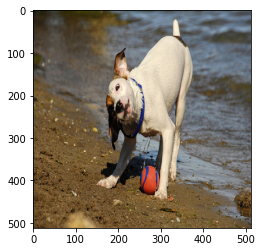

In [27]:
evaluate(35)